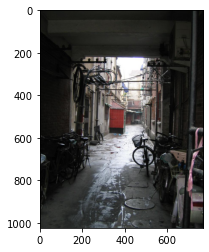

In [1]:
import matplotlib.pyplot as plt
import cv2
image1=plt.imread("manmade_training/sun_aawejawauhafqfcc.jpg")
plt.imshow(image1)
plt.show()

In [25]:
b, g, r = cv2.split(image1)
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

In [26]:
print(hist_b.shape)
print(hist_g.shape)
print(hist_r.shape)

(256, 1)
(256, 1)
(256, 1)


In [21]:
hist_b=hist_b.reshape(1,len(hist_b))
hist_g=hist_g.reshape(1,len(hist_g))
hist_r=hist_r.reshape(1,len(hist_r))
print(hist_b.shape)
print(hist_g.shape)
print(hist_r.shape)

(1, 256)
(1, 256)
(1, 256)


In [28]:
import numpy as np
histogram=np.concatenate([hist_b,hist_g,hist_r],axis=0)
histogram=histogram.reshape(len(histogram),)
histogram.shape

(768,)

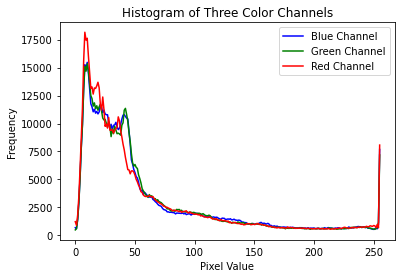

In [6]:
plt.plot(hist_b, color='blue', label='Blue Channel')
plt.plot(hist_g, color='green', label='Green Channel')
plt.plot(hist_r, color='red', label='Red Channel')

# Customize the plot
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Three Color Channels')
plt.legend()
plt.show()

In [7]:
X_train=[]
Y_train=[]

In [8]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
with open('natural_training.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        image=plt.imread(line.rstrip('\n'))
        b, g, r = cv2.split(image)
        hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
        hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
        hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
        histogram=np.concatenate([hist_b,hist_g,hist_r],axis=0)
        histogram=histogram.reshape(len(histogram),)
        X_train.append(histogram)
        Y_train.append(1)

In [9]:
with open('manmade_training.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        image=plt.imread(line.rstrip('\n'))
        if(image.dtype!=np.uint8):
            normalized_image = (image - np.min(image)) / (np.max(image) - np.min(image))
            image = (normalized_image * 255).astype(np.uint8)
        b, g, r = cv2.split(image)
        hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
        hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
        hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
        histogram=np.concatenate([hist_b,hist_g,hist_r],axis=0)
        histogram=histogram.reshape(len(histogram),)
        X_train.append(histogram)
        Y_train.append(0)

In [10]:
print(len(X_train))
print(len(Y_train))

1000
1000


In [11]:
X_test=[]
Y_test=[]

In [12]:
with open('natural_test.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        image=plt.imread(line.rstrip('\n'))
        b, g, r = cv2.split(image)
        hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
        hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
        hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
        histogram=np.concatenate([hist_b,hist_g,hist_r],axis=0)
        histogram=histogram.reshape(len(histogram),)
        X_test.append(histogram)
        Y_test.append(1)

In [13]:
with open('manmade_test.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        image=plt.imread(line.rstrip('\n'))
        b, g, r = cv2.split(image)
        hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
        hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
        hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
        histogram=np.concatenate([hist_b,hist_g,hist_r],axis=0)
        histogram=histogram.reshape(len(histogram),)
        X_test.append(histogram)
        Y_test.append(0)

In [14]:
print(len(X_test))
print(len(Y_test))

500
500


In [15]:
import numpy as np
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_test=np.array(X_test)
Y_test=np.array(Y_test)

In [16]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1000, 768)
(1000,)
(500, 768)
(500,)


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import time
start_time1 = time.time()

knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

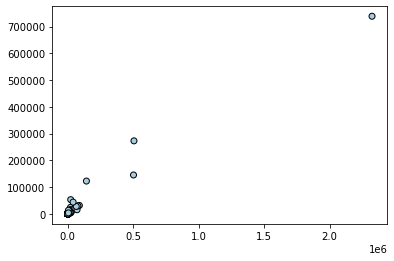

In [104]:
plt.scatter(np.array(X_train)[0:500, 0], np.array(X_train)[0:500, 1], c=Y_train[0:500], cmap=plt.cm.Paired, edgecolors='k')

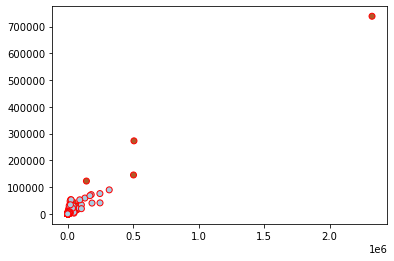

In [105]:
plt.scatter(np.array(X_train)[:, 0], np.array(X_train)[:, 1], c=Y_train, cmap=plt.cm.Paired, edgecolors='r')

In [29]:
Y_pred = knn_classifier.predict(X_test)
end_time1 = time.time()
elapsed_time1 = end_time1 - start_time1

print(f"Computation time: {elapsed_time1} seconds")
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
print("true negative:", tn)
print("false positive:", fp/250)
print("false negative:", fn/250)
print("true positive:", tp)
print(Y_pred)

Computation time: 3.4850659370422363 seconds
Accuracy: 0.582
true negative: 178
false positive: 0.288
false negative: 0.548
true positive: 113
[0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0
 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1
 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1
 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0
 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0
 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1

In [24]:
from sklearn import svm
model=svm.SVC()
start_time2 = time.time()
model.fit(X_train,Y_train)

SVC()

In [25]:
Y_pred=model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
end_time2 = time.time()
elapsed_time2 = end_time2 - start_time2

print(f"Computation time: {elapsed_time2} seconds")
print("Accuracy:", accuracy)
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
print("true negative:", tn)
print("false positive:", fp/250)
print("false negative:", fn/250)
print("true positive:", tp)
print(Y_pred)

Computation time: 7.044214487075806 seconds
Accuracy: 0.578
true negative: 197
false positive: 0.212
false negative: 0.632
true positive: 92
[0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0
 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0
 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1
 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0